<a href="https://colab.research.google.com/github/diana-rahma/Machine-Learning_Ganjil25_11/blob/main/JS9_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### TUGAS 1

In [ ]:
# Load data
import pandas as pd
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
print("\nInformasi Dataset:")
print(data.info())

print("\nStatistik Deskriptif:")
print(data.describe())

print("\nJumlah Data per Label:")
print(data['label'].value_counts())

# Cek missing value
print("\nCek Missing Value:")
print(data.isnull().sum())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     

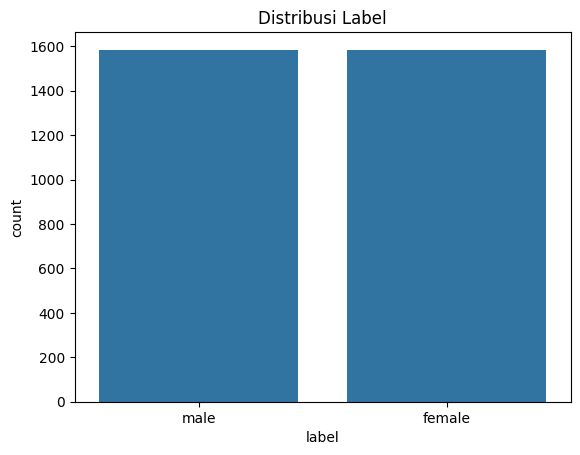

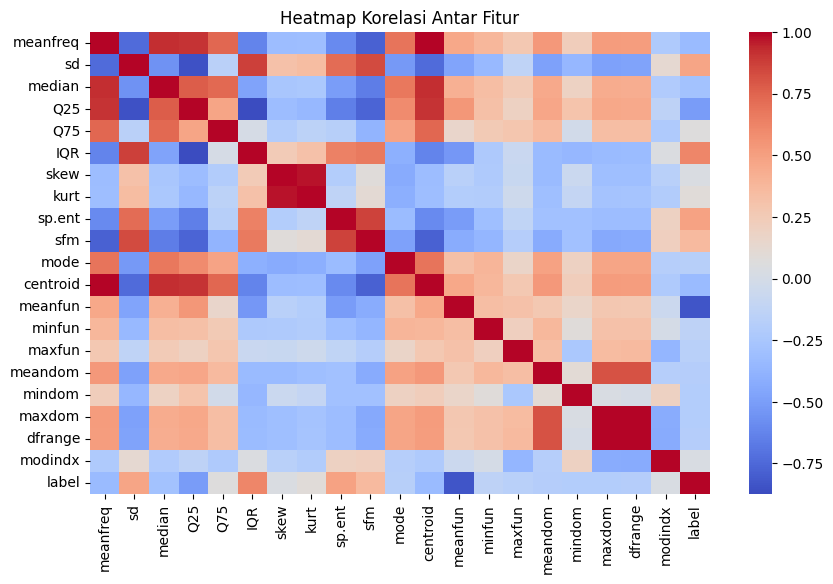

In [ ]:
# Visualisasi distribusi target
sns.countplot(x='label', data=data)
plt.title('Distribusi Label')
plt.show()

# Encode 'label' column to numerical for correlation calculation
data_encoded = data.copy()
data_encoded['label'] = data_encoded['label'].map({'male': 1, 'female': 0})

# Visualisasi korelasi antar fitur
plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(), cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = data.drop('label', axis=1)
y = data['label']

# Encode label jika masih berupa string (misal 'male', 'female')
le = LabelEncoder()
y = le.fit_transform(y)

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Tentukan nilai K (misalnya 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Latih model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.9763406940063092
Confusion Matrix:
 [[307  10]
 [  5 312]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       317
           1       0.97      0.98      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



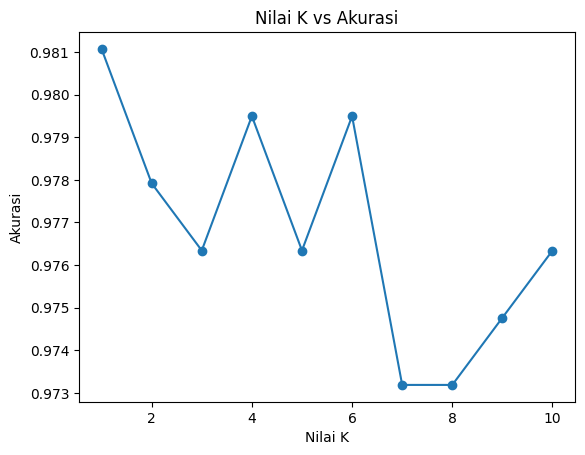

In [ ]:
acc = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    acc.append(model.score(X_test, y_test))

plt.plot(range(1, 11), acc, marker='o')
plt.title('Nilai K vs Akurasi')
plt.xlabel('Nilai K')
plt.ylabel('Akurasi')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("voice.csv")

# Pisahkan fitur dan target
X = df.drop("label", axis=1)
y = df["label"]

# Encode label male/female -> 0/1
le = LabelEncoder()
y = le.fit_transform(y)

# Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


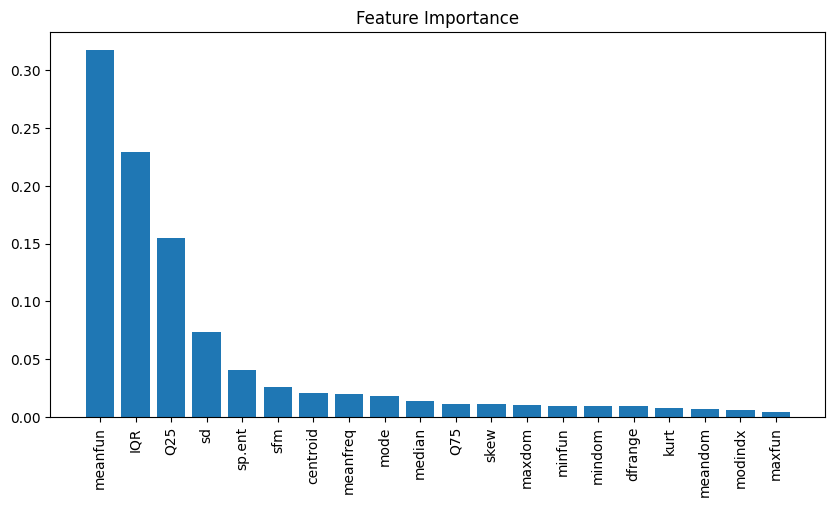

Fitur terbaik: ['meanfun', 'IQR', 'Q25', 'sd', 'sp.ent', 'sfm']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Urutkan fitur berdasarkan importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

# Ambil fitur terbaik (misal 6 teratas)
top_features = X.columns[indices][:6]
print("Fitur terbaik:", list(top_features))


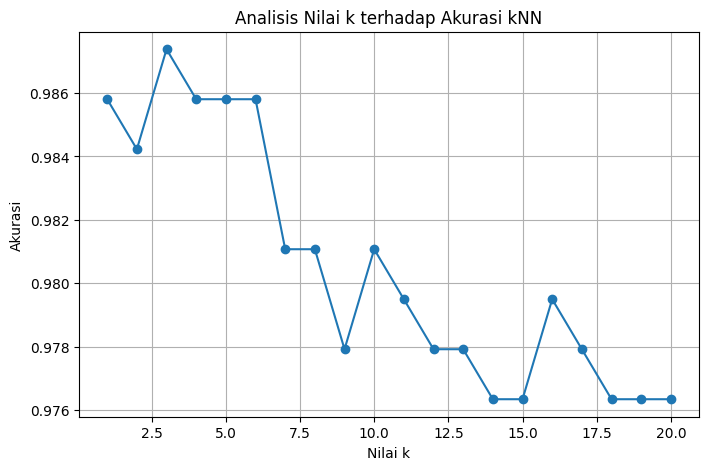

Nilai k terbaik: 3 dengan akurasi 0.9874


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Gunakan fitur terbaik
X_top = df[top_features]
X_scaled_top = scaler.fit_transform(X_top)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_top, y, test_size=0.2, random_state=42, stratify=y
)

# Uji berbagai nilai k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot grafik k vs akurasi
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title("Analisis Nilai k terhadap Akurasi kNN")
plt.xlabel("Nilai k")
plt.ylabel("Akurasi")
plt.grid(True)
plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print(f"Nilai k terbaik: {best_k} dengan akurasi {max(accuracies):.4f}")
